In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Load data

In [2]:
remanga = pd.read_csv('./data/raw/remanga_catalog_full.csv')
mangalib = pd.read_csv('./data/raw/mangalib_full.csv')
mangalib = mangalib.drop_duplicates(subset=['link'])
gmanga_matched = pd.read_csv('data/gmanga_matched_remanga_mangalib.csv', sep=';')
gmint_matched = pd.read_csv('data/gmint_matched_remanga_mangalib.csv', sep=';')
selfmanga_matched = pd.read_csv('data/selfmanga_matched_remanga_mangalib.csv', sep=';')

In [3]:
gmanga_matched.head(1)

,Unnamed: 0,Unnamed: 0.1,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id
0,0,0,1,Ван Пис,One Piece,One Piece,Budak Getah / Большой Куш / ワンピース / Один Кусок,1028,489.0,NaN


In [4]:
gmint_matched.head(1)

,Unnamed: 0,Unnamed: 0.1,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id
0,0,0,11,Денег нет!,No money,Okane ga nai,お金がないっ / 午夜情深 / 没有钱,116,NaN,NaN


In [5]:
# clean data
def del_useless_cols(df):
    useless = list(filter(lambda col: col.lower().count('unnamed')>0, df.columns.tolist()))
    df = df[df.name != '0']
    return df.drop(useless, axis=1)

gmanga_matched = del_useless_cols(gmanga_matched)
gmint_matched = del_useless_cols(gmint_matched)
selfmanga_matched = del_useless_cols(selfmanga_matched)
remanga.loc[:, 'id'] = list(range(len(remanga)))
mangalib.loc[:, 'id'] = list(range(len(mangalib)))

In [6]:
is_num = lambda s: (all(list(map(lambda c: c.isdigit() or c == '.', str(s)))))
def fetch_chapter(s):
    # from string ГЛАВЫ(N)
    s = s.lower().replace('главы (', '').strip(')')
    return s
remanga.loc[~remanga.n_chapters.apply(is_num), 'n_chapters'] = remanga[~remanga.n_chapters.apply(is_num)].n_chapters.apply(fetch_chapter)
remanga['n_chapters'] = remanga.n_chapters.astype(float).astype(int)

In [7]:
def get_matched(df):
    return df[(~df.remanga_id.isna() | (~df.mangalib_id.isna()))]

In [8]:
def matched(df):
    n_matched = len(get_matched(df))
    return n_matched

n = matched(gmint_matched)
print(f'mint matched part: {round(n / len(gmint_matched), 3)} ({n} of {len(gmint_matched)} are matched)')

n = matched(gmanga_matched)
print(f'read matched part: {round(n / len(gmanga_matched), 3)} ({n} of {len(gmanga_matched)} are matched)')

n = matched(selfmanga_matched)
print(f'read matched part: {round(n / len(selfmanga_matched), 3)} ({n} of {len(selfmanga_matched)} are matched)')

mint matched part: 0.471 (6434 of 13655 are matched)
read matched part: 0.578 (12040 of 20825 are matched)
read matched part: 0.451 (1094 of 2425 are matched)


In [14]:
pd.merge(remanga, gmanga_matched[gmanga_matched.remanga_id == 8900], left_on='id', right_on='remanga_id')

,rus_name,en_name,issue_year,avg_rating,total_views,total_votes,type,dir,n_chapters,id_x,id_y,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id
0,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,1540,Katekyo Hitman Reborn! dj - Обманщик,Katekyo Hitman Reborn! dj - Lie,Katekyo Hitman Reborn! dj - Usotsuki,NaN,1,8900.0,NaN
1,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,1588,Katekyo Hitman Reborn! dj - CD5,Katekyo Hitman Reborn! dj - CD5,Katekyo Hitman Reborn! dj - CD5,Katekyo Hitman Reborn! dj - CD5:somnus,1,8900.0,NaN
2,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,1818,Katekyo Hitman Reborn! dj - ROMP,Katekyo Hitman Reborn dj - ROMP,Katekyo Hitman Reborn! dj - ROMP,NaN,1,8900.0,NaN
3,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,1851,Sunset Speeder,Katekyo Hitman Reborn! dj - Sunset Speeder,Katekyo Hitman Reborn! dj - Sunset Speeder,NaN,1,8900.0,NaN
4,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2193,Katekyo Hitman Reborn! dj - Diamond,Katekyo Hitman Reborn! dj - Diamond,Katekyo Hitman Reborn! dj - Diamond,NaN,1,8900.0,NaN
5,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2194,Katekyo Hitman Reborn! dj - Asterisk,Katekyo Hitman Reborn! dj - Asterisk,Katekyo Hitman Reborn! dj - Asterisk,NaN,1,8900.0,NaN
6,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2199,Черно-белый,Katekyo Hitman Reborn! dj - White Black,Katekyo Hitman Reborn! dj - Shiro Kuro,NaN,1,8900.0,NaN
7,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2208,Кантабиле,Katekyo Hitman Reborn! dj - Cantabile,Kateikyoushi Hitman Reborn! dj - Cantabile,NaN,1,8900.0,NaN
8,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2209,Tapir,Katekyo Hitman Reborn! dj - Tapir,Katekyo Hitman Reborn! dj - Baku,NaN,1,8900.0,NaN
9,Белая ворона,Katekyo Hitman Reborn! dj - Black Sheep,2005.0,6.0,209,9,Манга,katekyo-hitman-reborn-dj--black-sheep,1,8900,2213,Триплекс,Katekyo Hitman Reborn! dj - ХХХ,Katekyo Hitman Reborn! dj - ХХХ,NaN,1,8900.0,NaN


In [12]:
from collections import Counter

Counter(gmanga_matched.remanga_id.tolist()).most_common()

[(8900.0, 46),
 (16016.0, 12),
 (5641.0, 10),
 (13118.0, 8),
 (14116.0, 8),
 (8698.0, 8),
 (16182.0, 7),
 (12869.0, 7),
 (4693.0, 6),
 (13041.0, 6),
 (15184.0, 6),
 (12794.0, 6),
 (11087.0, 6),
 (12068.0, 6),
 (6243.0, 6),
 (8548.0, 6),
 (1914.0, 5),
 (8518.0, 5),
 (14721.0, 5),
 (5734.0, 5),
 (9308.0, 5),
 (13790.0, 5),
 (7188.0, 5),
 (14726.0, 5),
 (11124.0, 5),
 (14223.0, 5),
 (11374.0, 5),
 (5096.0, 5),
 (6148.0, 5),
 (489.0, 4),
 (13310.0, 4),
 (15366.0, 4),
 (12380.0, 4),
 (14109.0, 4),
 (3735.0, 4),
 (6882.0, 4),
 (4047.0, 4),
 (11628.0, 4),
 (6316.0, 4),
 (15999.0, 4),
 (16193.0, 4),
 (1228.0, 4),
 (8613.0, 4),
 (1984.0, 4),
 (8238.0, 4),
 (8374.0, 4),
 (1114.0, 4),
 (15326.0, 4),
 (8132.0, 4),
 (12713.0, 4),
 (3683.0, 4),
 (8715.0, 4),
 (15650.0, 4),
 (13316.0, 4),
 (8096.0, 4),
 (15076.0, 4),
 (7073.0, 4),
 (16837.0, 4),
 (939.0, 4),
 (10079.0, 4),
 (2430.0, 4),
 (16760.0, 4),
 (11253.0, 4),
 (12918.0, 4),
 (10963.0, 4),
 (2178.0, 4),
 (9194.0, 4),
 (9409.0, 4),
 (11371.0, 4)

# Analyze matched 

In [18]:
fetch_valid_ixs = lambda df, col: df[~df[col].isna()][col].tolist()
remanga_matched_ids = []
remanga_matched_ids += fetch_valid_ixs(gmanga_matched, 'remanga_id')
remanga_matched_ids += fetch_valid_ixs(gmint_matched, 'remanga_id')
remanga_matched_ids += fetch_valid_ixs(selfmanga_matched, 'remanga_id')

In [22]:
remanga[~remanga.id.isin(remanga_matched_ids)]

,rus_name,en_name,issue_year,avg_rating,total_views,total_votes,type,dir,n_chapters,id
0,Поднятие уровня в одиночку,Solo Leveling,2018.0,9.6,9546754,1210457,Манхва,solo-leveling,151,0
2,Пик боевых искусств,Martial Peak,2018.0,8.7,25303479,3640188,Маньхуа,martial_peak,1086,2
5,Становление богом,Apotheosis - Elevation to the Status of a God,2015.0,8.8,15069366,2287124,Маньхуа,one_hundred_to_make_god,736,5
6,Ублюдок FFF-ранга,FFF-Class Trashero,2019.0,9.2,2828581,512054,Манхва,fffclass-trashero,86,6
12,Как демон-император стал дворецким,How the Demon Emperor became a Butler,2019.0,9.2,0,0,Маньхуа,how-the-demon-emperor-became-a-butler,0,12
...,...,...,...,...,...,...,...,...,...,...
16888,Искусство тени,Shadow Skill,1992.0,0.0,69,0,Манга,shadow-skill,2,16888
16889,Королевское яйцо,Queen's Egg,2008.0,0.0,302,12,Манга,queens-egg,7,16889
16890,Синяя печать,Blue Seal,1992.0,0.0,1469,36,Манга,blue-seal,53,16890
16891,Пылающая Луна,Burning Moon,2005.0,0.0,40,0,Маньхуа,burning-moon,1,16891


In [23]:
# len(rm_views_missing[rm_views_missing>100000]) / len(rm_views_missing)

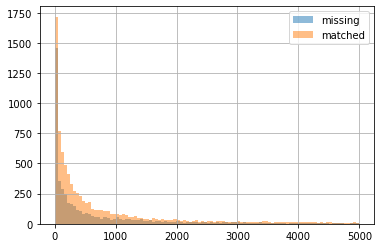

In [24]:
rm_views_missing = remanga[~remanga.id.isin(remanga_matched_ids)].total_views
rm_views_matched = remanga[ remanga.id.isin(remanga_matched_ids)].total_views
n = 5000
rm_views_missing[rm_views_missing < n].hist(bins=100, alpha=0.5)
rm_views_matched[rm_views_matched < n].hist(bins=100, alpha=0.5)
plt.legend(['missing', 'matched'])

In [25]:
remanga[~remanga.id.isin(remanga_matched_ids)].to_csv('./data/missing/remanga_exclusive.csv', sep=';')

In [26]:
mangalib_matched_ids = []
mangalib_matched_ids += fetch_valid_ixs(gmanga_matched, 'mangalib_id')
mangalib_matched_ids += fetch_valid_ixs(gmint_matched, 'mangalib_id')
mangalib_matched_ids += fetch_valid_ixs(selfmanga_matched, 'mangalib_id')

In [27]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)].to_csv('./data/missing/mangalib_exclusive.csv', sep=';')

In [28]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)]

,link,views,chapters,manga_type,author,name,eng_name,original_name,nan,id
0,https://mangalib.me/shingeki-no-kyojin,300717.0,139,Манга,ISAYAMA Hajime,Атака Титанов,Shingeki no Kyojin,Вторжение Гигантов,NaN,0
1,https://mangalib.me/i-alone-level-up,356664.0,154,Манхва,GEE So-Lyung,Поднятие уровня в одиночку,Solo Leveling,나 혼자만 레벨업,NaN,1
3,https://mangalib.me/poidyom-gulyat,234711.0,5,Руманга,baranka,Пойдём гулять!,Night portrait,야화첩,NaN,3
4,https://mangalib.me/night-portrait,480997.0,84,Манхва,Beon Deok,Ночные этюды,Night portrait,야화첩,NaN,4
7,https://mangalib.me/the-beginning-after-the-end,217089.0,6 377 058,OEL-манга,TurtleMe,Начало после конца,The beginning after the end,끝이 아닌 시작,NaN,7
...,...,...,...,...,...,...,...,...,...,...
49725,https://mangalib.me/leunemageuliteuui-yeon-in,271.0,НЕТ ГЛАВ - МАНГА ЛИЦЕНЗИРОВАНА,Манхва,Naver,Любовники Ренемагрита,Lovers of Renemagritus,"Even with a Ghost, I Want to Be in Love",NaN,34714
49727,https://mangalib.me/moscow-dawn,505.0,НЕТ ГЛАВ - МАНГА ЛИЦЕНЗИРОВАНА,Манхва,Hwangjangmi,Московский Рассвет,Moscow Dawn,Gwisinijiman Saranghago Sipeo,NaN,34716
49728,https://mangalib.me/dont-leave-please-stay,77.0,1,Манхва,В цвете,"Не Уходи! Пожалуйста, Останься",Don't Leave! Please Stay,Gwisinijiman Saranghago Sipeo,NaN,34717
49729,https://mangalib.me/bespilote-island,107.0,НЕТ ГЛАВ - МАНГА ЛИЦЕНЗИРОВАНА,Манхва,В цвете,Беспилотный остров,Bespilote island,오늘을 담다,NaN,34718


# Matched ids

In [29]:
def exclusive(df, matched_ids):
    n_matched =  len(df[~df.id.isin(matched_ids)])
    return n_matched

n = exclusive(remanga, remanga_matched_ids)
print(f'remanga  exclusive part: {round(n / len(remanga), 3)} ({n} of {len(remanga)} are exclusive)')

n = exclusive(mangalib, mangalib_matched_ids)
print(f'mangalib exclusive part: {round(n / len(mangalib), 3)} ({n} of {len(mangalib)} are exclusive)')

remanga  exclusive part: 0.364 (6144 of 16899 are exclusive)
mangalib exclusive part: 0.902 (31333 of 34720 are exclusive)


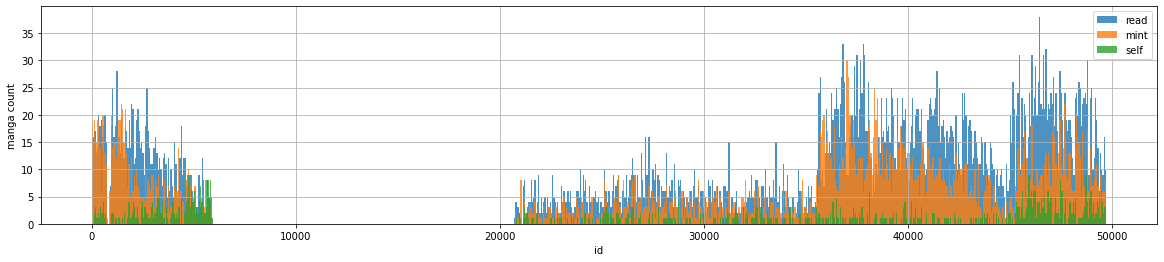

In [30]:
# Matches with mangalib

def matched_ids_hist(series):
    return series.hist(bins=800, alpha=0.8, figsize=(20, 4))

matched_ids_hist(gmanga_matched.mangalib_id),
matched_ids_hist(gmint_matched.mangalib_id),
matched_ids_hist(selfmanga_matched.mangalib_id)
plt.xlabel('id')
plt.ylabel('manga count')
plt.legend(['read', 'mint', 'self'])

Text(0, 0.5, 'manga count')

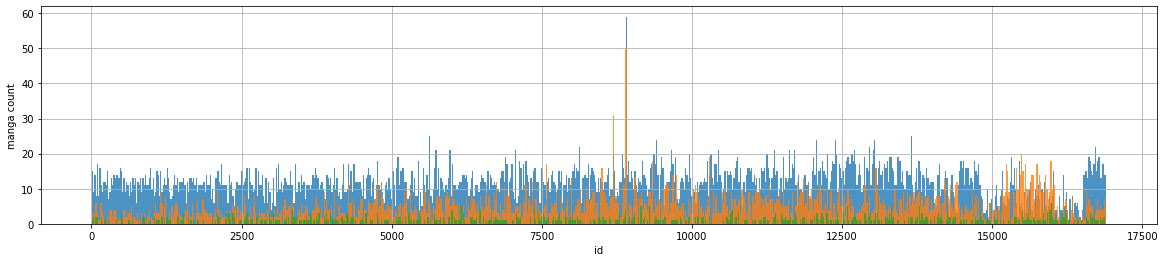

In [31]:
# Matches with remanga

def matched_ids_hist(series):
    return series.hist(bins=800, alpha=0.8, figsize=(20, 4))

matched_ids_hist(gmanga_matched.remanga_id),
matched_ids_hist(gmint_matched.remanga_id),
matched_ids_hist(selfmanga_matched.remanga_id)
plt.xlabel('id')
plt.ylabel('manga count')

# Calc chapters diff

In [32]:
# add number of remanga chapters
# read
cond = ~gmanga_matched.remanga_id.isna()
remanga_ids = gmanga_matched.loc[cond].remanga_id.astype(int)
gmanga_matched.loc[cond, 'remanga_chapters_n'] = remanga.set_index('id').loc[remanga_ids].n_chapters.tolist()

# mint
cond = ~gmint_matched.remanga_id.isna()
remanga_ids = gmint_matched.loc[cond].remanga_id.astype(int)
gmint_matched.loc[cond, 'remanga_chapters_n'] = remanga.set_index('id').loc[remanga_ids].n_chapters.tolist()

# self
cond = ~selfmanga_matched.remanga_id.isna()
remanga_ids = selfmanga_matched.loc[cond].remanga_id.astype(int)
selfmanga_matched.loc[cond, 'remanga_chapters_n'] = remanga.set_index('id').loc[remanga_ids].n_chapters.tolist()

In [33]:
chapters_n = gmanga_matched[['chapters_count', 'remanga_chapters_n']]
chapters_n = chapters_n[(chapters_n['chapters_count'].apply(is_num)) & 
                        (chapters_n['remanga_chapters_n'].apply(is_num))].astype(float)

chapters_n_mint = gmint_matched[['chapters_count', 'remanga_chapters_n']]
chapters_n_mint = chapters_n_mint[(chapters_n_mint['chapters_count'].apply(is_num)) & 
                                  (chapters_n_mint['remanga_chapters_n'].apply(is_num))].astype(float)

chapters_n_self = gmint_matched[['chapters_count', 'remanga_chapters_n']]
chapters_n_self = chapters_n_self[(chapters_n_self['chapters_count'].apply(is_num)) & 
                                  (chapters_n_self['remanga_chapters_n'].apply(is_num))].astype(float)

chapters_n = pd.concat((chapters_n, chapters_n_mint, chapters_n_self))

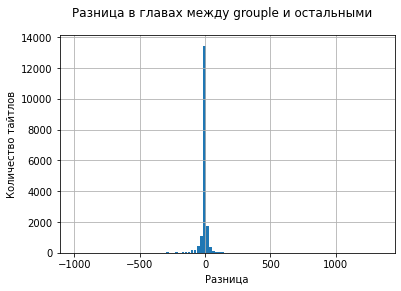

In [34]:
chapters_diff = chapters_n['chapters_count'] - chapters_n['remanga_chapters_n']
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=100, rwidth=0.9)
plt.suptitle('Разница в главах между grouple и остальными')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff.png')

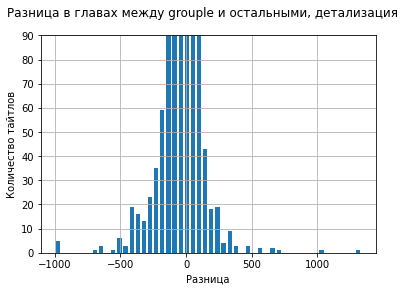

In [35]:
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=50, rwidth=0.7)
plt.ylim(0, 90)
plt.suptitle('Разница в главах между grouple и остальными, детализация')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff_detailed.png')

In [36]:
safe_cast = lambda s: None if not is_num(s) else float(s)
# gmanga_matched = gmanga_matched[gmanga_matched.,?]
gmanga_matched.loc[:, 'chapters_diff'] = gmanga_matched['remanga_chapters_n'].apply(safe_cast) - gmanga_matched['chapters_count'].apply(safe_cast)
gmanga_matched.to_csv('data/chapters_diff/gmanga_chapters_diff.csv', sep=';', index=False)
gmanga_matched.head(3)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id,remanga_chapters_n,chapters_diff
0,1,Ван Пис,One Piece,One Piece,Budak Getah / Большой Куш / ワンピース / Один Кусок,1028,489.0,NaN,997.0,-31.0
1,2,Наруто,Naruto,Naruto,ナルト,704,507.0,NaN,704.0,0.0
2,3,Крутой учитель Онидзука,Great Teacher Onizuka,GTO,ジー ティー オー / Великий учитель Онизука,201,NaN,NaN,NaN,NaN


In [37]:
gmint_matched.loc[:, 'chapters_diff'] = gmint_matched['remanga_chapters_n'].apply(safe_cast) - gmint_matched['chapters_count'].apply(safe_cast)
gmint_matched.to_csv('data/chapters_diff/gmint_chapters_diff.csv', sep=';', index=False)
gmint_matched.head(3)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id,remanga_chapters_n,chapters_diff
0,11,Денег нет!,No money,Okane ga nai,お金がないっ / 午夜情深 / 没有钱,116,NaN,NaN,NaN,NaN
1,18,Проклятие цвета крови,Crimson Spell,Crimson Spell,Kurimuzon Superu/クリムゾン・スペル/緋紅色的魔咒/緋色誘惑,75,NaN,NaN,NaN,NaN
2,19,Ганц,Gantz,Gantz,ガンツ,385,9492.0,2673.0,40.0,-345.0


In [38]:
selfmanga_matched.loc[:, 'chapters_diff'] = selfmanga_matched['remanga_chapters_n'].apply(safe_cast) - selfmanga_matched['chapters_count'].apply(safe_cast)
selfmanga_matched.to_csv('data/chapters_diff/selfmanga_chapters_diff.csv', sep=';', index=False)
selfmanga_matched.head(3)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id,remanga_chapters_n,chapters_diff
0,2332,Шируба-беру,Silver Bell,Шируба-беру,NaN,5,15986.0,49040.0,0.0,-5.0
1,2409,Обыкновенная история,Usual story,Обыкновенная история,NaN,3,NaN,NaN,NaN,NaN
2,2581,Моррэйн,Morrain,Моррэйн,NaN,11,NaN,NaN,NaN,NaN
